# 1. 개요

> https://kirion.tistory.com/entry/1-%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%A7%A4%EB%A7%A4-%EC%8B%9C%EC%A0%90-%EB%AA%A8%EB%8B%88%ED%84%B0%EB%A7%81-%EA%B0%9C%EC%9A%94

> RSI와 RMI의 계산 공식을 보자.

1. U = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일) 동안의 U의 평균값
4. AD = 일정기간(N일) 동안의 D의 평균값
5. RS = AU / AD
6. RSI = AU / (AU + AD) = RS / (1 + RS)
7. RSI 시그널 =  RSI의 이동평균선

여기서 N은 투자자가 설정할 수 있지만, 통상적으로 14일로 사용할 것을 권장한다.
 
RMI의 계산 공식은 RSI의 계산 공식에서 U와 D를 N일전 주가로 수정하면 된다.

1. U = N일전 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = N일전 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일) 동안의 U의 평균값
4. AD = 일정기간(N일) 동안의 D의 평균값
5. RM = AU / AD
6. RMI = AU / (AU + AD) = RM / (1 + RS)
7. RMI 시그널 =  RSI의 이동평균선

즉, RSI보다 조금 더 장기적인 매매 추세를 볼 수 있다.

# 2. RSI, RMI

In [1]:
import pandas as pd
import numpy as np
import datetime 
import time
import FinanceDataReader as fdr
import copy

import matplotlib.pyplot as plt

In [2]:
price_data = fdr.DataReader("005930","2024-01-01")
price_data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013
2024-01-03,78500,78800,77000,77000,21753644,-0.032663
2024-01-04,76100,77300,76100,76600,15324439,-0.005195
2024-01-05,76700,77100,76400,76600,11304316,0.000000
2024-01-08,77000,77500,76400,76500,11088724,-0.001305


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


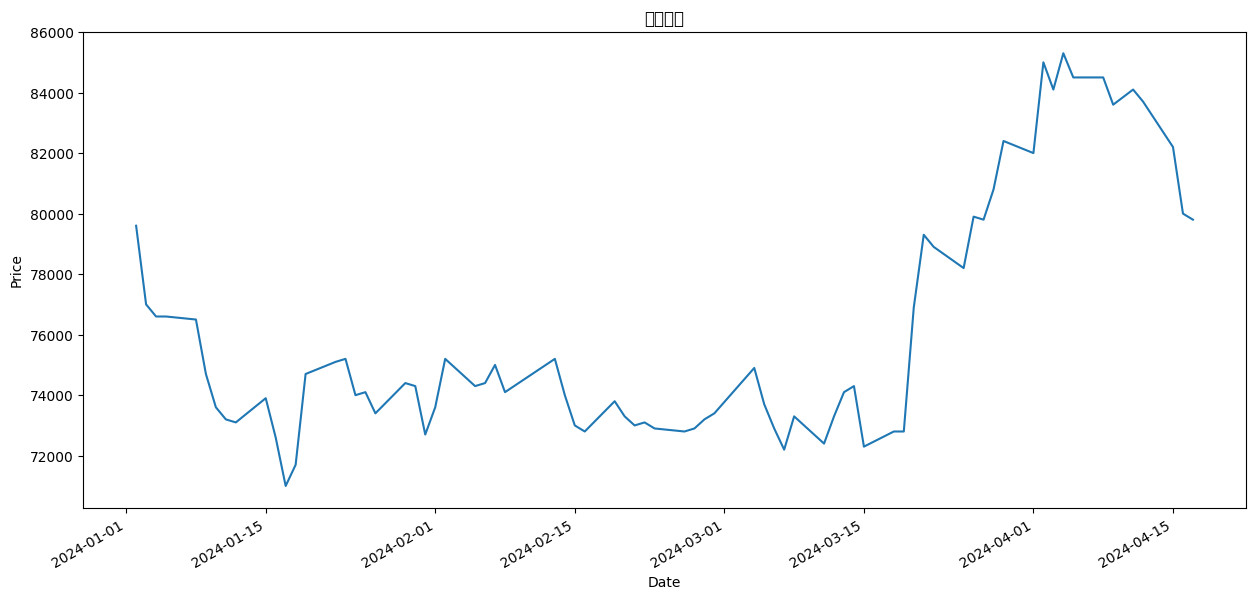

In [3]:
plt.figure(figsize=(15,7))
plt.title("삼성전자")
price_data.Close.plot()
plt.ylabel("Price")
plt.show()

In [4]:
def rsi(ohlc: pd.DataFrame,y_label, period: int = 14): 
    delta = ohlc[y_label].diff() 
    ups, downs = delta.copy(), delta.copy() 
    ups[ups < 0] = 0 
    downs[downs > 0] = 0 
    AU = ups.ewm(com = period-1, min_periods = period).mean() 
    AD = downs.abs().ewm(com = period-1, min_periods = period).mean()
    RS = AU/AD 
    return pd.Series(100 - (100/(1 + RS)), name = "RSI")
def rmi(ohlc: pd.DataFrame,y_label, period: int = 14):
    delta = ohlc[y_label].diff(periods = 5) 
    ups, downs = delta.copy(), delta.copy() 
    ups[ups < 0] = 0 
    downs[downs > 0] = 0 
    AU = ups.ewm(com = period-1, min_periods = period).mean() 
    AD = downs.abs().ewm(com = period-1, min_periods = period).mean()
    RM = AU/AD 
    return pd.Series(100 - (100/(1 + RM)), name = "RMI")

In [5]:
RSI_df = rsi(price_data, "Close",14)
RMI_df  = rmi(price_data, "Close",14)
price_data["RSI"] = RSI_df
price_data["RMI"] = RMI_df

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


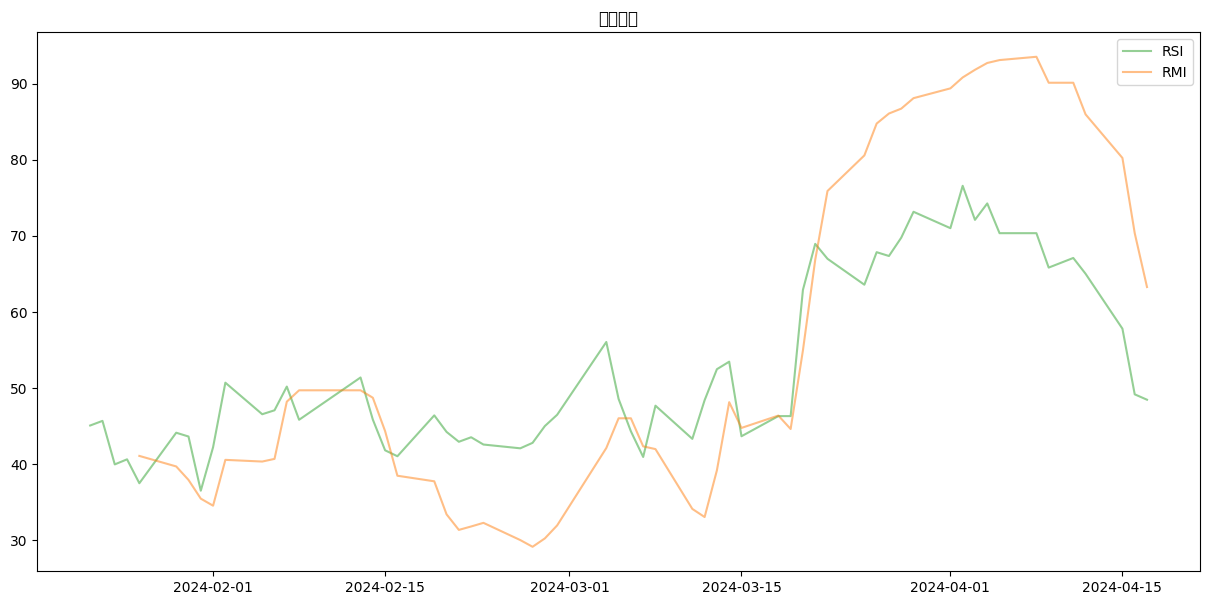

In [6]:
plt.figure(figsize=(15,7))
plt.title("삼성전자")
plt.plot(price_data['RSI'], label='RSI',color = "tab:green",alpha = 0.5)
plt.plot(price_data['RMI'], label='RMI',color = "tab:orange",alpha = 0.5)
plt.legend(loc = "best")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


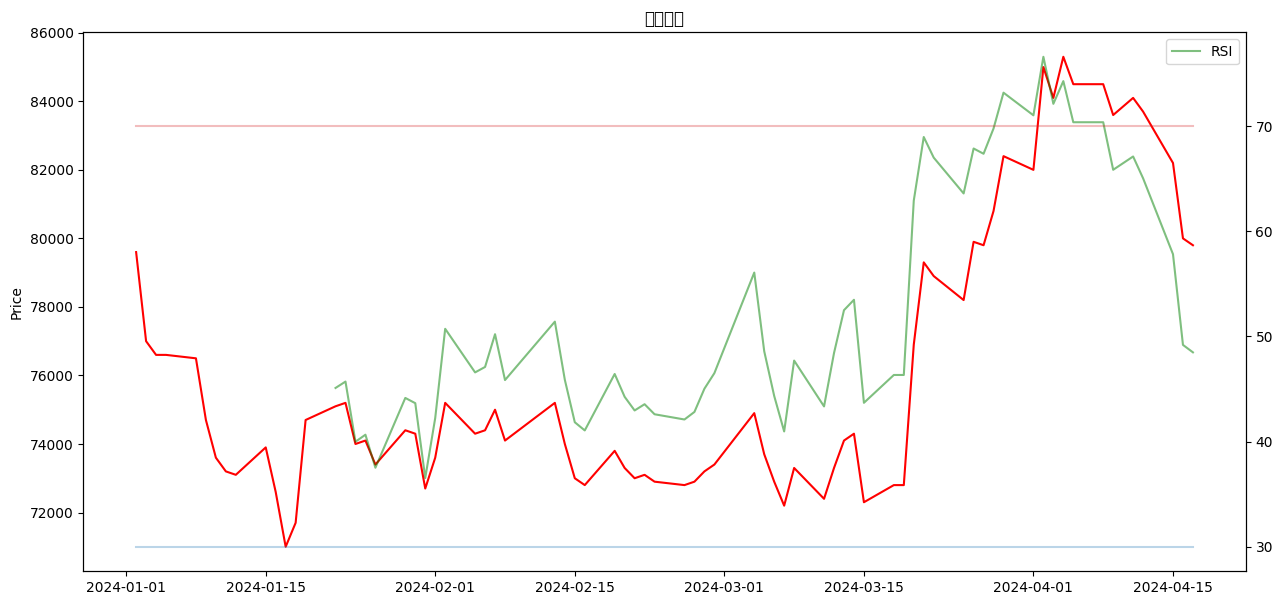

In [7]:
price_data["lower"] = 30
price_data["upper"] = 70

fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "red",alpha = 1, zorder=3)

ax2 = ax1.twinx() 
ax2.plot(price_data["RSI"],color = "green",alpha = 0.5)
ax2.plot(price_data["lower"] ,color = "tab:blue",alpha = 0.3)
ax2.plot(price_data["upper"],color = "tab:red",alpha = 0.3)
plt.legend(["RSI"],loc = 'best')
plt.title("삼성전자")
plt.show()

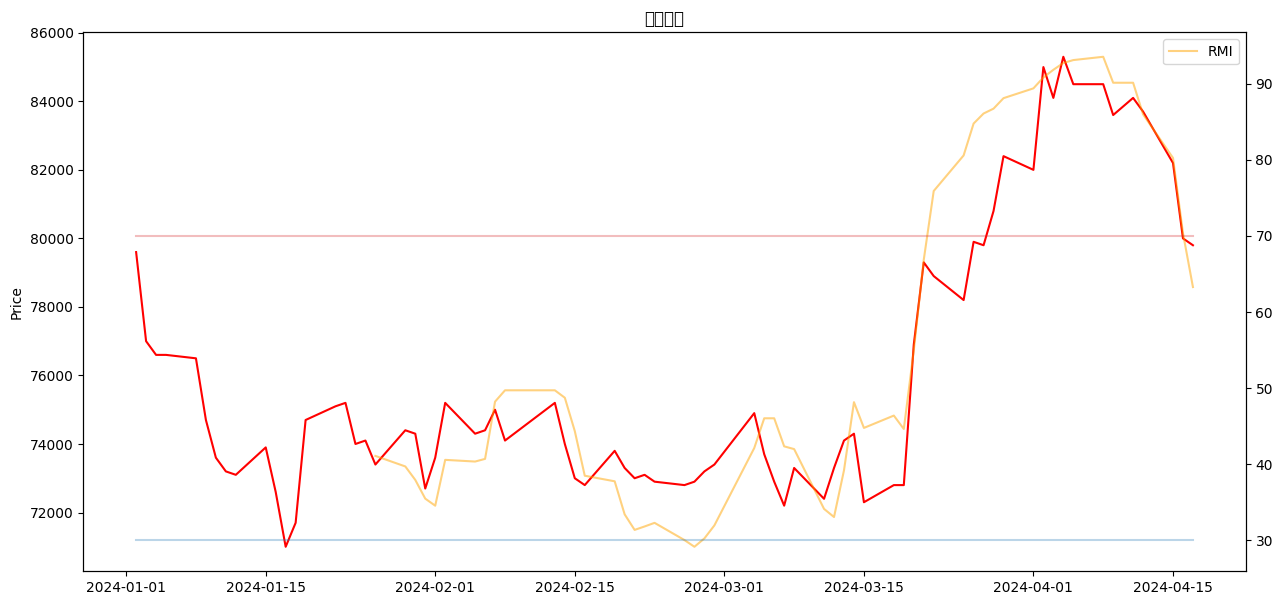

In [8]:
fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "red",alpha = 1, zorder=3)

ax2 = ax1.twinx() 
ax2.plot(price_data["RMI"],color = "orange",alpha = 0.5)
ax2.plot(price_data["lower"] ,color = "tab:blue",alpha = 0.3)
ax2.plot(price_data["upper"],color = "tab:red",alpha = 0.3)
plt.legend(["RMI"],loc = 'best')
plt.title("삼성전자")
plt.show()

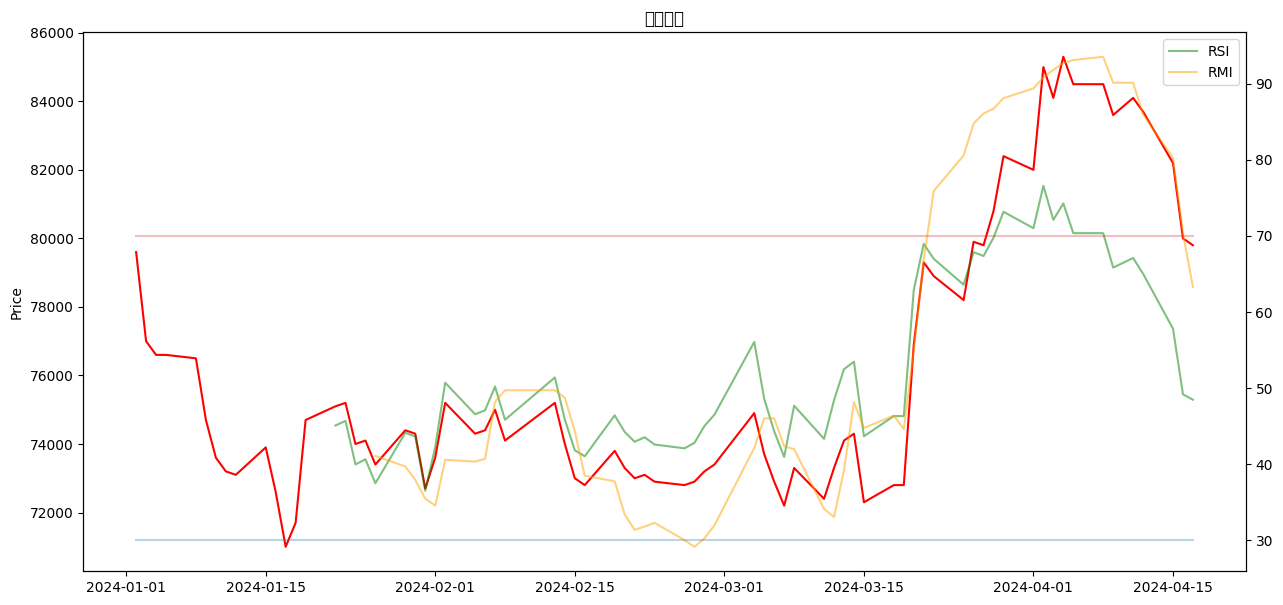

In [9]:
fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "red",alpha = 1, zorder=3)

ax2 = ax1.twinx() 
ax2.plot(price_data["RSI"],color = "green",alpha = 0.5)
ax2.plot(price_data["RMI"],color = "orange",alpha = 0.5)
ax2.plot(price_data["lower"] ,color = "tab:blue",alpha = 0.3)
ax2.plot(price_data["upper"],color = "tab:red",alpha = 0.3)
plt.legend(["RSI","RMI"],loc = 'best')
plt.title("삼성전자")
plt.show()

# 3. 백테스팅

In [12]:
import pandas as pd
import numpy as np
import datetime 
import time 
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import copy

df_krx = fdr.StockListing('KRX')
kospi_data = df_krx[(df_krx["Market"]=="KOSPI") & (~df_krx["Code"].isna())]

In [14]:
save_path = "trading_simulation/trading_simulation_test"

ks = df_krx[df_krx["Name"]=="삼성전자"]

target_stock = ks.Name.values[0]

price_data = fdr.DataReader(ks.Code.values[0],"2020-1-1")
price_data["stock_name"]=target_stock
RSI_df = rsi(price_data, "Close",14)
RMI_df = rmi(price_data, "Close",14)
price_data["RSI"] = RSI_df
price_data["RMI"] = RMI_df

price_data.tail()

,Open,High,Low,Close,Volume,Change,stock_name,RSI,RMI
Date,,,,,,,,,
2024-04-11,83200,84700,82500,84100,25538009,0.005981,삼성전자,67.163038,90.051834
2024-04-12,84700,84900,83200,83700,17061770,-0.004756,삼성전자,65.096359,85.925220
2024-04-15,82900,83200,81200,82200,26663772,-0.017921,삼성전자,57.901116,80.233426
2024-04-16,81200,81300,79400,80000,31949845,-0.026764,삼성전자,49.294991,70.406641
2024-04-17,80700,80800,78900,79800,17478588,-0.002500,삼성전자,48.587956,63.350577


In [18]:
def save_txt(filename, lines, line_col):
    lines.insert(0,0)
    lines.append(0)
    if line_col is not None:
        line_col.insert(0, "Non")
        line_col.append("Non")
    with open(filename, 'a') as f:
        if line_col is not None:
            f.writelines(str(line_col))
            f.write("\n")
            
        f.writelines(str(lines))
        f.write("\n")

meta_info = ["name","time","보유KRW", "보유주","price","총자산",
             "TAG", "stock","money","tax","target_index"]
save_txt(save_path+".txt", meta_info, None)
log_info = ["name","time","price","target_index","buy","sell",
            "current_stock","avg_price","yield","total_money"]
save_txt(save_path+"_log.txt", log_info, None)

log_info = ["time","money"]
log_info.append(target_stock)
log_info.append(target_stock+"_price")
    
save_txt(save_path+"_total_price_log.txt", log_info, None)

In [22]:
class set_init():
    def __init__(self,stock_list,save_path,seed_money,set_base_buy):
        self.money = seed_money
        self.total_money = seed_money
        self.stock_list = stock_list
        self.stock_count = 0
        self.now_rmi_list = 0
        self.now_rsi_list = 0
        self.stock_price = 0
        self.my_asset_price = 0
        self.v1 = 1
        self.v2 = 1
        self.save_path = save_path
        self.set_stand_price = set_base_buy
        
        
    def set_data(self,tmp,target_index):
        self.buy_list = 0
        self.sell_list = 0
        self.stock_price = tmp.tail(1).Close.values[0]
        self.now_index_list = tmp[target_index].values[0]
        self.time_print =  tmp.index.values[0]
        self.time_check =  tmp.ts.values[0]
        self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
        
    def buy(self):
        money2 = copy.copy(self.money)
        trading_fee = 0
        if self.money < self.stock_price:
            buy_stock = 0
            buy_money = 0
            
        elif self.money <= self.set_stand_price : 
            buy_stock = money2 // self.stock_price
            buy_money = buy_stock * self.stock_price
            self.money = self.money - buy_money

        else : 
            have_money = money2
            if have_money>self.set_stand_price: have_money = self.set_stand_price
                
            buy_stock = have_money // self.stock_price
            buy_money = buy_stock * self.stock_price
            
            self.money = self.money - buy_money
        
        self.my_asset_price = self.my_asset_price + buy_money
        self.stock_count = np.round(self.stock_count + buy_stock,8)
        self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
        print("buy ",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
              buy_stock,buy_money,np.round(self.total_money))
        
        save_list =  [self.stock_list,self.time_check,self.money,self.stock_count,
                      self.stock_price,self.total_money,"buy",buy_stock,buy_money,"tax",
                      self.now_index_list]
        save_txt(self.save_path+".txt",save_list, None)
        self.buy_list =1
#         return self.money, self.stocks, buy_stock,buy_money, total_money,self.my_asset_price, tax
    
    def sell(self,all_tag):
        if self.stock_count == 0:
            sell_stock = 0
            sell_money = 0
            trading_fee = 0        
        elif self.my_asset_price <= self.set_stand_price or all_tag ==1: 
            sell_stock = self.stock_count
            self.my_asset_price = 0
            sell_money = sell_stock * self.stock_price
            tradig_fee = sell_money *0.0025
        else : 
            rate_ = np.round(self.set_stand_price/self.my_asset_price,2)
            sell_stock = int(self.stock_count * rate_)
            
            self.my_asset_price = self.my_asset_price - self.my_asset_price * (sell_stock/self.stock_count)

            sell_money = sell_stock * self.stock_price
            tradig_fee = sell_money *0.0025

        self.stock_count = np.round(self.stock_count - np.round(sell_stock,8),8)

        sell_money = sell_money - tradig_fee
        self.money = self.money + np.round(sell_money,2)
        self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
        if all_tag ==1:            
            print("all_sell",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
                  sell_stock,sell_money,np.round(self.total_money))

            save_list = [self.stock_list,self.time_check,self.money,self.stock_count,
                         self.stock_price,self.total_money,"all_sell",sell_stock,sell_money,tradig_fee,
                         self.now_index_list]
        else:
            print("sell",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
                  sell_stock,sell_money,np.round(self.total_money))

            save_list = [self.stock_list,self.time_check,self.money,self.stock_count,
                         self.stock_price,self.total_money,"sell",sell_stock,sell_money,tradig_fee,
                         self.now_index_list]
        save_txt(self.save_path+".txt", save_list, None)
        self.sell_list =1
#         return self.money, self.stocks, sell_stock,sell_money,total_money,self.my_asset_price,tradig_fee


    def log_recording(self):
        log_info = [self.stock_list,self.time_check,self.stock_price,
                    self.now_index_list,
                    self.buy_list,self.sell_list,
                    self.stock_count,
                    self.v1,self.v2,
                    self.total_money]
        save_txt(self.save_path+"_log.txt", log_info, None)

        log_info2 = [self.time_check,self.money]+[self.stock_count]+[self.stock_price]
        save_txt(self.save_path+"_total_price_log.txt", log_info2, None)
        
        
    def yield_table(self):
        try:
            self.v1 = self.my_asset_price / self.stock_count
            self.v2 = self.stock_price * self.stock_count / self.my_asset_price
        except:
            None

In [23]:
def trading_simulation(bitrade,price_data,target_index,lower_cut,upper_cut,stop_loss):
    lower_list = False
    upper_list = False
    plot_value = []
    for st in price_data.index:
        all_tag = 0
        dt64 = np.datetime64(st)
        ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')

        tmp = price_data[price_data.index == st]
        tmp["ts"]=ts
        bitrade.set_data(tmp,target_index)
    #     bitrade.set_stand_price = int(bitrade.total_money *0.5)
        bitrade.yield_table()
        if bitrade.v2 *100-100 < stop_loss :
            all_tag = 1
            if bitrade.stock_count >0:
                bitrade.sell(all_tag)
            lower_list = False
            upper_list = False

        else:        
            if bitrade.now_index_list <lower_cut:
                lower_list = True

            elif bitrade.now_index_list >= lower_cut and lower_list == True:  
                if bitrade.money >100000:
                    bitrade.buy()
                lower_list = False

            elif bitrade.now_index_list >upper_cut:
                upper_list = True

            elif bitrade.now_index_list <= upper_cut and upper_list == True:
                if bitrade.stock_count >0:
                    bitrade.sell(all_tag)
                upper_list = False

        bitrade.log_recording()
        plot_value.append(int(bitrade.money + (bitrade.stock_count*bitrade.stock_price)))
    return plot_value

In [24]:
%%time
lower_cut = 30
upper_cut = 70
seed_money = 10000000
set_base_buy = 5000000
stop_loss = -100
bitrade = set_init(target_stock,save_path,seed_money,set_base_buy)
plot_value = trading_simulation(bitrade,price_data,"RSI",lower_cut,upper_cut,stop_loss)
print("DONE")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

buy  2020-03-24T00:00:00.000000000 삼성전자 5023300 106 106 4976700 10000000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

sell 2020-06-11T00:00:00.000000000 삼성전자 10764710.0 0 106 5741410.5 10764710.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020

buy  2021-08-24T00:00:00.000000000 삼성전자 5775110.0 66 66 4989600 10764710.0
buy  2021-10-07T00:00:00.000000000 삼성전자 834710.0 135 69 4940400 10500710.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

buy  2021-10-15T00:00:00.000000000 삼성전자 63610.0 146.0 11.0 771100.0 10298210.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

sell 2021-12-27T00:00:00.000000000 삼성전자 5503576.0 78.0 68 5439966.0 11759176.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

buy  2022-01-28T00:00:00.000000000 삼성전자 519176.0 146.0 68 4984400 11220976.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

buy  2022-04-13T00:00:00.000000000 삼성전자 38276.0 153.0 7.0 480900.0 10549376.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

sell 2023-01-30T00:00:00.000000000 삼성전자 4331916.0 85.0 68 4293639.0 9712416.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWith

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

sell 2023-06-01T00:00:00.000000000 삼성전자 9141062.0 17.0 68 4809147.0 10346362.0
sell 2023-06-05T00:00:00.000000000 삼성전자 10356915.0 0.0 17.0 1215852.75 10356915.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

DONE
CPU times: total: 7.97 s
Wall time: 12.5 s


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('2020-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\1432988875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_pr

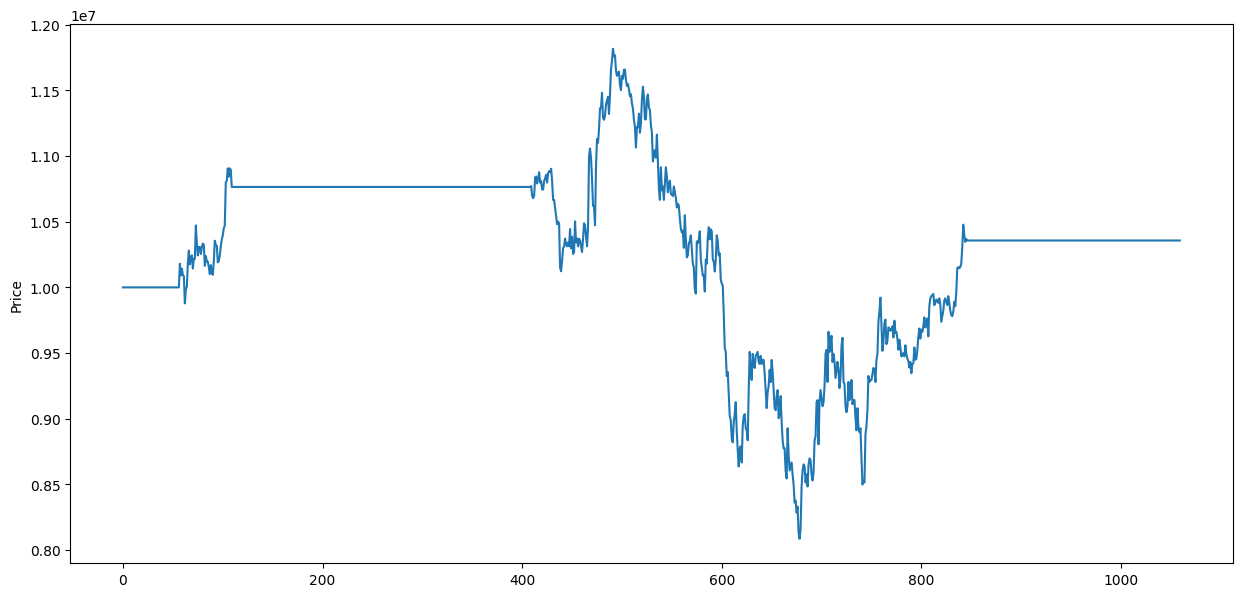

In [25]:
fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
plt.plot(plot_value)
plt.show()

# 4. 시각화

In [34]:
file_path = "./trading_simulation/trading_simulation_test"

def read_log(file_path):
    log1 = pd.read_csv(file_path+".txt",sep = ",",encoding='euc-kr')
    log1 = log1.iloc[:,1:-1]
    log1.columns = ["name","time","price","target_index","buy","sell","current_stock","avg_price","yield","total_money"]
    log1["yield"] = log1["yield"].fillna(0)
    log1["yield"] = log1["yield"].replace(' nan',1)
    log1["yield"] = log1["yield"].astype(float)
    log1["yield"] = np.round((log1["yield"]-1)*100,2)
    log1.loc[log1["yield"]<= -99,"yield"] = 0
    log1["avg_price"] = log1["avg_price"].fillna(0)
    log1["avg_price"] = log1["avg_price"].replace(' nan',0)
    log1["avg_price"] = log1["avg_price"].astype(float)
    log1["avg_price"] = np.round(log1["avg_price"],0)
    log1.loc[log1["avg_price"]<=1,"avg_price"] = np.nan
    for i,ii in enumerate(log1.time):  
        log1.loc[i,"time"]  = datetime.datetime.utcfromtimestamp(ii)
    log1.set_index(log1.time,inplace= True)
    log1["target_index"] = log1["target_index"].replace(' nan',0)
    log1["target_index"] = log1["target_index"].astype(float)
    
    log1["stock_rate"] = log1["current_stock"]*log1["price"]/log1["total_money"]*100

    return log1

In [35]:
def log_plot(log1,start_day=None,last_day=None):
    if start_day is not None:
        log1 = log1[log1.index>=start_day]
    if last_day is not None:
        log1 = log1[log1.index<=last_day]
        
    log_p = log1[log1["buy"]==1]
    log_p = log1[log1["buy"]==1]
    fig, ax1 = plt.subplots(figsize = (14,7)) 
    ax1.set_ylabel('Price') 
    ax1.plot(log1["price"],color = "skyblue",alpha = 1, zorder=3)
    ax1.plot(log1["avg_price"],color = "black",alpha = 1, zorder=4)
    
    ax1.scatter(log_p.index,log_p["price"],s = 40,color = "blue", zorder=5)
    
    log_p = log1[log1["sell"]==1]
    ax1.scatter(log_p.index,log_p["price"],s = 40,color = "red", zorder=5)
    plt.legend(["price","avg_price","buy","sell"],loc = 'upper left')
    
    ax2 = ax1.twinx() 
    ax2.set_ylabel('Index') 
    ax2.plot(log1["target_index"],color = "green",alpha = 0.2)
    ax2.fill_between(log1.index,log1["stock_rate"],color = "black", zorder=5,alpha = 0.2)
    ax2.plot(log1["lower"],color = "blue",alpha = 0.2)
    ax2.plot(log1["upper"],color = "red",alpha = 0.2)
    ax2.set_ylim(0,100)
    plt.title(log1["name"].values[0])
    plt.legend(["target_index",'Stock_Rate'],loc = 'upper right')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


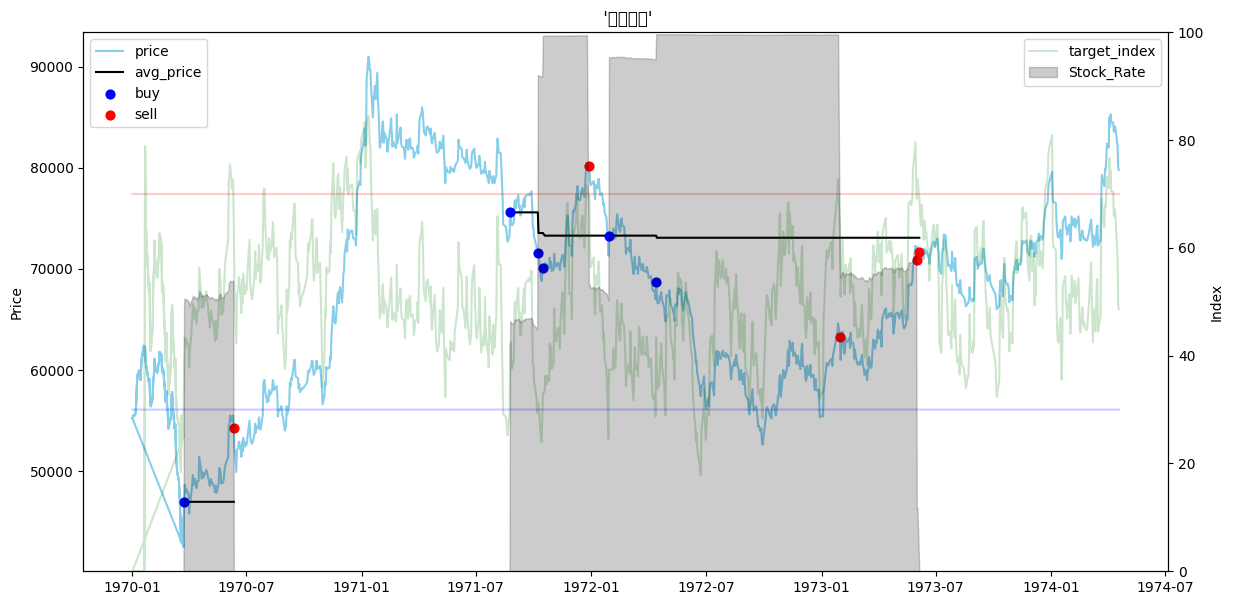

In [42]:
log1 = read_log(file_path+"_log")
log1["lower"] = lower_cut
log1["upper"] = upper_cut
log_plot(log1)

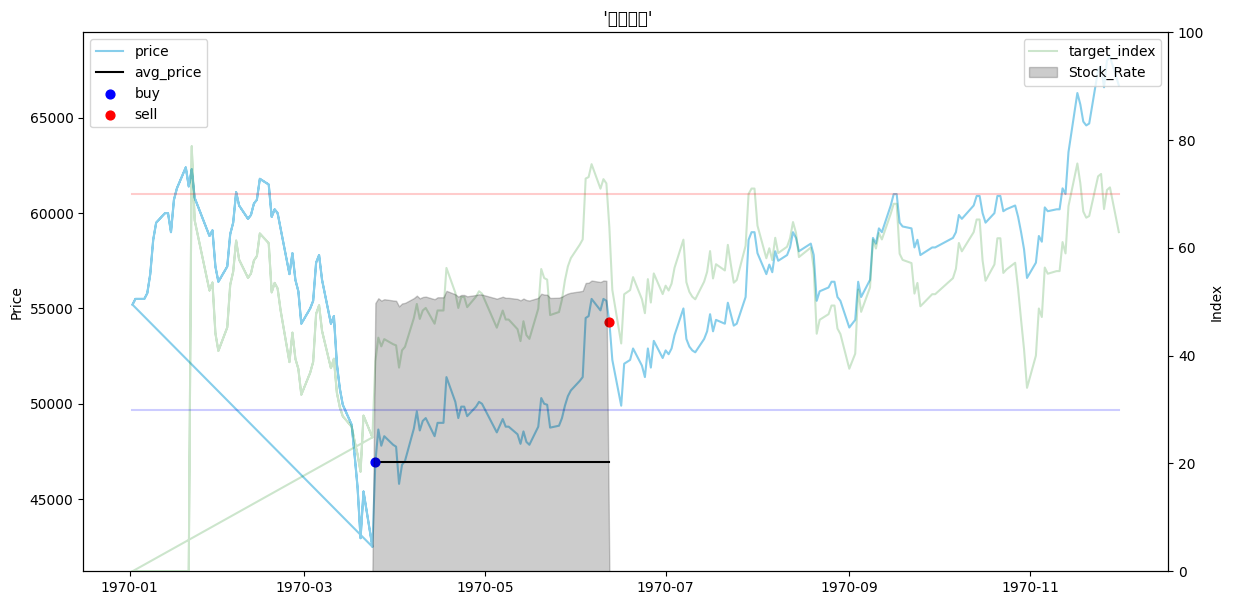

In [56]:
#for i in range(2013,2023):
#    log_plot(log1,str(i),str(i+1))
log_plot(log1,'1970-01','1970-12')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


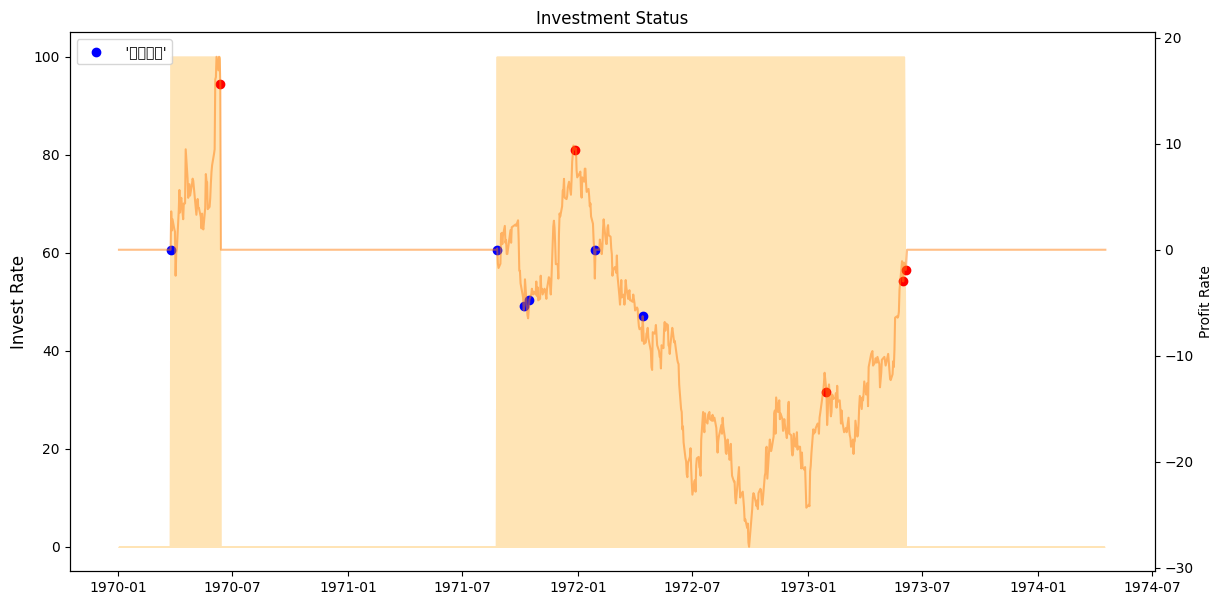

In [57]:
def profit_rate_plot(file_path,color_list,color_list2):
    invest_rate_df = None
    fig, ax1 = plt.subplots(figsize = (14,7)) 
    ax1.set_ylabel("Rate",size =12)
    ax2 = ax1.twinx() 
    stock_name = []
    
    log1 = read_log(file_path+"_log")
    df = pd.DataFrame(np.round(log1["price"] *log1["current_stock"]))
    invest_rate_df = pd.concat([invest_rate_df,df],axis =1)
    stock_name.append(log1.tail(1)["name"].values[0])

    log1 = read_log(file_path+"_log")
    log_p = log1[log1["buy"]==1]
    ax2.scatter(log_p.index,log_p["yield"],color = "blue", zorder=5)
    log_p = log1[log1["sell"]==1]
    ax2.scatter(log_p.index,log_p["yield"],color = "red", zorder=5)

    ax2.plot(log1["yield"],color = color_list2,alpha = 0.5, zorder=5)
        
    ax2.legend(stock_name,loc = "upper left")
    ax2.set_ylabel('Profit Rate') 
    
    invest_rate_df.columns = stock_name
    invest_rate_df["sum"] = invest_rate_df.sum(axis = 1)
    
    
    invest_rate_df.iloc[:,0] = np.round(invest_rate_df.iloc[:,0]/invest_rate_df["sum"]*100,2)
    invest_rate_df = invest_rate_df[:-2]
    invest_rate_df.fillna(0, inplace = True)
    invest_rate_df["sum2"] = invest_rate_df.iloc[:,:-1].sum(axis = 1)
    
    ax1.set_ylabel('Invest Rate') 
    ax1.fill_between(invest_rate_df.index, invest_rate_df["sum2"],color = "moccasin", zorder=1)
    
    invest_rate_df["tmp"] = 0
    invest_rate_df["tmp"] = invest_rate_df["tmp"] + invest_rate_df.iloc[:,0]
    if max(invest_rate_df.iloc[:,0])>0:
        ax1.fill_between(invest_rate_df.index, invest_rate_df["tmp"],color = color_list, zorder=10)
    else:
        ax1.plot()

    plt.title("Investment Status")
    plt.show()
   
color_list = "moccasin"
color_list2 = "tab:orange"
profit_rate_plot(file_path,color_list,color_list2)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


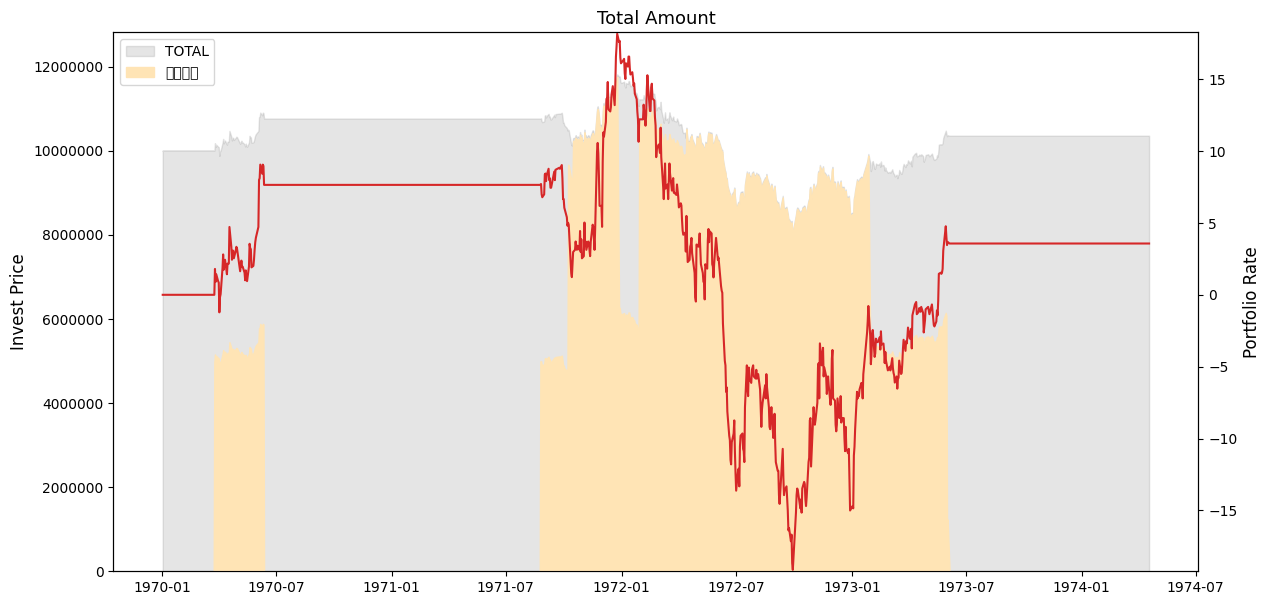

In [59]:
def total_price_df(file_path,target_stock,seed_money):
    log_total = pd.read_csv(file_path+"_total_price_log.txt",sep =",",encoding='euc-kr')
    log_total = log_total.iloc[:,1:-1]
    log_column = ["time","current_money"]
    
    log_column.append(target_stock)
    log_column.append(target_stock+"_price")
    log_total.columns = log_column
    
    for i,ii in enumerate(log_total.time):  
        log_total.loc[i,"time"] = datetime.datetime.utcfromtimestamp(ii)
    log_total.set_index(log_total.time,inplace= True)
    
    log_total["current_money"] = np.round(log_total["current_money"])
    log_total["total_money"] = log_total["current_money"]
    log_total[target_stock+"_money"] = np.round(log_total[target_stock]*log_total[target_stock+"_price"])
    log_total["total_money"] = log_total["total_money"] + log_total[target_stock+"_money"]

    log_total["profit_rate"] = np.round(log_total["total_money"]/seed_money*100-100,2)
    return log_total
    
def total_plot(log_total_all,stock_list,color_list,seg = False,start_day = None, last_day = None):
    log_total = log_total_all.copy()
    if start_day is not None:
        log_total = log_total[log_total.index>=start_day]
    if last_day is not None:
        log_total = log_total[log_total.index<=last_day]
        
    fig, ax1 = plt.subplots(figsize = (14,7)) 
    ax1.set_ylabel("Invest Price",size =12)
    ax2 = ax1.twinx() 
    ax1.set_ylim(0,max(log_total["total_money"])+1000000)
    ax1.ticklabel_format(axis='y',useOffset=False, style='plain')
    ax1.fill_between(log_total.index, log_total["total_money"],color = "tab:gray",alpha = 0.2)
    if seg == True:
        log_total["tmp"] = 0
        log_total["tmp"] = log_total["tmp"] + log_total[target_stock+"_money"]
        if max(log_total[target_stock+"_money"])>0:
            ax1.fill_between(log_total.index, log_total["tmp"],color = color_list, zorder=10)
        else:
            ax1.plot()
        ax1.legend(["TOTAL"]+[target_stock],loc = "upper left")
        
    else:
        ax1.legend(["TOTAL"],loc = "upper left")
    ax2.plot(log_total["profit_rate"],color = "tab:red")
    ax2.set_ylabel("Portfolio Rate",size = 12)
    
    ax2.set_ylim(min(log_total["profit_rate"])-0.1,max(log_total["profit_rate"])+0.1)
    plt.title("Total Amount",size = 13)
    plt.show()

log_total = total_price_df(file_path,target_stock,seed_money)
total_plot(log_total,target_stock,color_list,True)

# 5. KOSPI 종목 백테스팅